**Задача 1: Прогнозування попиту**

*Мета: Розробити систему прогнозування попиту на короткостроковий період (14 днів) через 7 днів від останньої дати в даних, для всіх груп товарів.*

Опис: 
1. Використовуючи надані дані про транзакції, створіть дві моделі 
прогнозування:
 - Модель машинного навчання.
 - Класичну модель прогнозування часових рядів.
   
2. Дайте обґрунтовані коментарі щодо вибору методів та підходів, 
поясніть, чому ви обрали саме їх.

3. Надати скрипт або ноутбук (.py/.ipynb), який буде містити 
технічне рішення та можливість розрахунку прогнозу на майбутній 
період (scoring).


Очікуваний результат: Файл з кодом (.py або .ipynb), який включає 
дві моделі прогнозування, пояснення вибору методів, і можливість 
розрахунку прогнозу на майбутній період.


# Робота з даними

## Завантаження даних

In [1]:
data_directory = "Data/S_Data"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
products = pd.read_csv(f'{data_directory}/products.csv')
orders = pd.read_csv(f'{data_directory}/orders.csv')
order_items = pd.read_csv(f'{data_directory}/order_items.csv')

In [4]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [5]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## Первинна обробка

In [7]:
orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Бачимо що істнують замовлення що було відмінено, їх варто прибрати з вибірки адже це "надуманий" попит

In [8]:
orders = orders[~(orders["order_status"] == "canceled")]
orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Також багато колонок даних не мають цікавості в цьому дослідженні

 - З таблиці orders нам треба тільки: "order_id", "order_purchase_timestamp"
 - З products: "product_id", "product_category_name"
 - З order_items: "order_id", "order_item_id", "product_id"

In [9]:
orders = orders[["order_id", "order_purchase_timestamp"]]

In [10]:
products = products[["product_id", "product_category_name"]]

In [11]:
order_items = order_items[["order_id", "order_item_id", "product_id"]]

In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


В даних присутні 609 продуктів без катигорій, можна їх видалити або надати свою категорію

Перше прибере їх зі статистики, що може вплинути на обрахунки загального попиту

Друге передбачає надання категорії продуктам про яких ми нічого не знаємо, але можна їх зробити окремою категорією надавши однакове ім'я з айді продукта (якби мали назву продукта я б застосував її)

In [13]:
products.loc[:, "product_category_name"] = products["product_category_name"].fillna(products["product_id"])
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


## Завантаження в SQLite

In [14]:
import sqlite3
con = sqlite3.connect("data.db")

In [15]:
cur = con.cursor()

In [16]:
products.to_sql("products", con, if_exists='replace', index=False)

32951

In [17]:
orders.to_sql("orders", con, if_exists='replace', index=False)

98816

In [18]:
order_items.to_sql("order_items", con, if_exists='replace', index=False)

112650

### Об'єднання даних

In [19]:
res = cur.execute("""DROP VIEW IF EXISTS order_items_grouped""")
res.fetchall()

[]

In [20]:
res = cur.execute("""
CREATE VIEW order_items_grouped as
SELECT
order_id,
product_id,
COUNT(*) as prod_count
FROM order_items oi
GROUP BY order_id, product_id
""")
res.fetchall()

[]

In [21]:
res = cur.execute("""SELECT * FROM order_items_grouped limit 10""")
res.fetchall()

[('00010242fe8c5a6d1ba2dd792cb16214', '4244733e06e7ecb4970a6e2683c13e61', 1),
 ('00018f77f2f0320c557190d7a144bdd3', 'e5f2d52b802189ee658865ca93d83a8f', 1),
 ('000229ec398224ef6ca0657da4fc703e', 'c777355d18b72b67abbeef9df44fd0fd', 1),
 ('00024acbcdf0a6daa1e931b038114c75', '7634da152a4610f1595efa32f14722fc', 1),
 ('00042b26cf59d7ce69dfabb4e55b4fd9', 'ac6c3623068f30de03045865e4e10089', 1),
 ('00048cc3ae777c65dbb7d2a0634bc1ea', 'ef92defde845ab8450f9d70c526ef70f', 1),
 ('00054e8431b9d7675808bcb819fb4a32', '8d4f2bb7e93e6710a28f34fa83ee7d28', 1),
 ('000576fe39319847cbb9d288c5617fa6', '557d850972a7d6f792fd18ae1400d9b6', 1),
 ('0005a1a1728c9d785b8e2b08b904576c', '310ae3c140ff94b03219ad0adc3c778f', 1),
 ('0005f50442cb953dcd1d21e1fb923495', '4535b0e1091c278dfd193e5a1d63b39f', 1)]

Згрупуємо дані по категоріям та рокам, місяцям з днями, обраховуючи загальні покупки

In [22]:
res = cur.execute("""DROP VIEW IF EXISTS cat_demand""")
res.fetchall()

[]

In [23]:
res = cur.execute("""
CREATE VIEW cat_demand as
SELECT
p.product_category_name as category_name,
STRFTIME('%Y-%m-%d', o.order_purchase_timestamp) as purchase_timestamp,
SUM(oig.prod_count) as amount
FROM 
    order_items_grouped oig
    INNER JOIN orders o ON o.order_id = oig.order_id
    INNER JOIN products p ON p.product_id = oig.product_id
GROUP BY p.product_category_name, STRFTIME('%Y-%m-%d', o.order_purchase_timestamp)
""")
res.fetchall()

[]

In [24]:
res = cur.execute("""SELECT * FROM cat_demand limit 10""")
res.fetchall()

[('0082684bb4a60a862baaf7a60a5845ed', '2017-11-10', 1),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-03-24', 1),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-04', 1),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-08', 2),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-10', 2),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-14', 2),
 ('00d62b338366db4c4aec8547ea8f928e', '2017-11-27', 1),
 ('0103863bf3441460142ec23c74388e4c', '2018-01-06', 1),
 ('014fcf6bd5cd4c7ee29fb3bb618c445e', '2018-03-04', 1),
 ('017457b0013d01d5a5a4a020ed1f14b9', '2017-11-24', 1)]

Завантажимо дані назад в датафрейм для продовження аналізу

In [25]:
category_stats = pd.read_sql_query("SELECT * FROM cat_demand", con)

In [26]:
category_stats

,category_name,purchase_timestamp,amount
0,0082684bb4a60a862baaf7a60a5845ed,2017-11-10,1
1,00ab8a8b9fe219511dc3f178c6d79698,2017-03-24,1
2,00ab8a8b9fe219511dc3f178c6d79698,2017-04-04,1
3,00ab8a8b9fe219511dc3f178c6d79698,2017-04-08,2
4,00ab8a8b9fe219511dc3f178c6d79698,2017-04-10,2
...,...,...,...
19747,utilidades_domesticas,2018-08-24,18
19748,utilidades_domesticas,2018-08-25,5
19749,utilidades_domesticas,2018-08-26,9
19750,utilidades_domesticas,2018-08-27,13


In [27]:
category_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19752 entries, 0 to 19751
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category_name       19752 non-null  object
 1   purchase_timestamp  19752 non-null  object
 2   amount              19752 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 463.1+ KB


Зведемо дані до єдиних типів

In [28]:
category_stats["purchase_timestamp"] = pd.to_datetime(category_stats["purchase_timestamp"])
category_stats["category_name"] = category_stats["category_name"].astype("string")
category_stats

,category_name,purchase_timestamp,amount
0,0082684bb4a60a862baaf7a60a5845ed,2017-11-10,1
1,00ab8a8b9fe219511dc3f178c6d79698,2017-03-24,1
2,00ab8a8b9fe219511dc3f178c6d79698,2017-04-04,1
3,00ab8a8b9fe219511dc3f178c6d79698,2017-04-08,2
4,00ab8a8b9fe219511dc3f178c6d79698,2017-04-10,2
...,...,...,...
19747,utilidades_domesticas,2018-08-24,18
19748,utilidades_domesticas,2018-08-25,5
19749,utilidades_domesticas,2018-08-26,9
19750,utilidades_domesticas,2018-08-27,13


In [29]:
category_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19752 entries, 0 to 19751
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   category_name       19752 non-null  string        
 1   purchase_timestamp  19752 non-null  datetime64[ns]
 2   amount              19752 non-null  int64         
dtypes: datetime64[ns](1), int64(1), string(1)
memory usage: 463.1 KB


In [30]:
by_day_activity = category_stats.groupby("purchase_timestamp").sum().drop("category_name", axis = 1).sort_values(by = "purchase_timestamp")
by_day_activity

,amount
purchase_timestamp,
2016-09-04,2
2016-09-15,3
2016-10-03,7
2016-10-04,67
2016-10-05,55
...,...
2018-08-26,82
2018-08-27,71
2018-08-28,45


In [31]:
# making a by day index
by_day_activity = by_day_activity.reindex(pd.date_range(start=by_day_activity.index.min(), end=by_day_activity.index.max()))
by_day_activity.fillna({"amount" : 0}, inplace = True)
by_day_activity[["amount"]] = by_day_activity[["amount"]].astype(int)
by_day_activity

,amount
2016-09-04,2
2016-09-05,0
2016-09-06,0
2016-09-07,0
2016-09-08,0
...,...
2018-08-30,0
2018-08-31,0
2018-09-01,0
2018-09-02,0


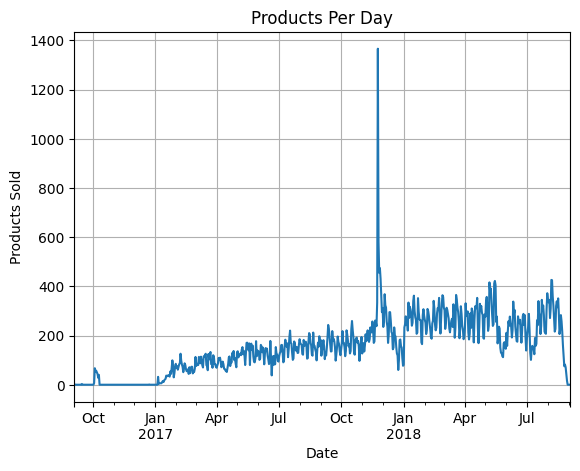

In [32]:
by_day_activity['amount'].plot(kind='line')
plt.title('Products Per Day')
plt.xlabel('Date')
plt.ylabel('Products Sold')
plt.grid(True)
plt.show()

Схоже що до початку 2017 року дані є неповними, варто їх прибрати для уникнення їх пливу, таксамо дані за останні 10 днів в наборі

In [33]:
by_day_activity = by_day_activity.truncate(before = "2017-01-15", after = "2018-08-24")

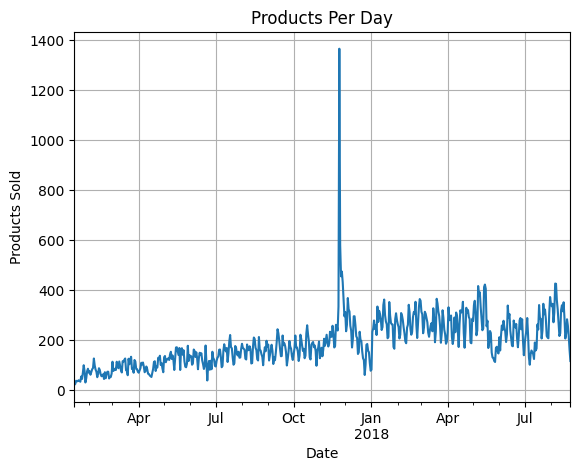

In [34]:
by_day_activity['amount'].plot(kind='line')
plt.title('Products Per Day')
plt.xlabel('Date')
plt.ylabel('Products Sold')
plt.grid(True)
plt.show()

# Розробка моделей

In [35]:
# transforming datetime into int format
X = by_day_activity.index.values.astype(np.int64) // 10 ** 11
y = by_day_activity["amount"].values

In [36]:
X_train = X[:-7]
y_train = y[:-7]

X_test = X[-7:]
y_test = y[-7:]

In [37]:
X_test.shape

(7,)

In [38]:
# we have a big outlier in the data, we should add scaling to see if that impact training process
from sklearn.preprocessing import QuantileTransformer
scale_transformer = QuantileTransformer(n_quantiles = 100)

import joblib
joblib.dump(scale_transformer, "models/sales_scale_transformer.pkl")

y_scaled = scale_transformer.fit_transform(y_train.reshape(-1, 1))

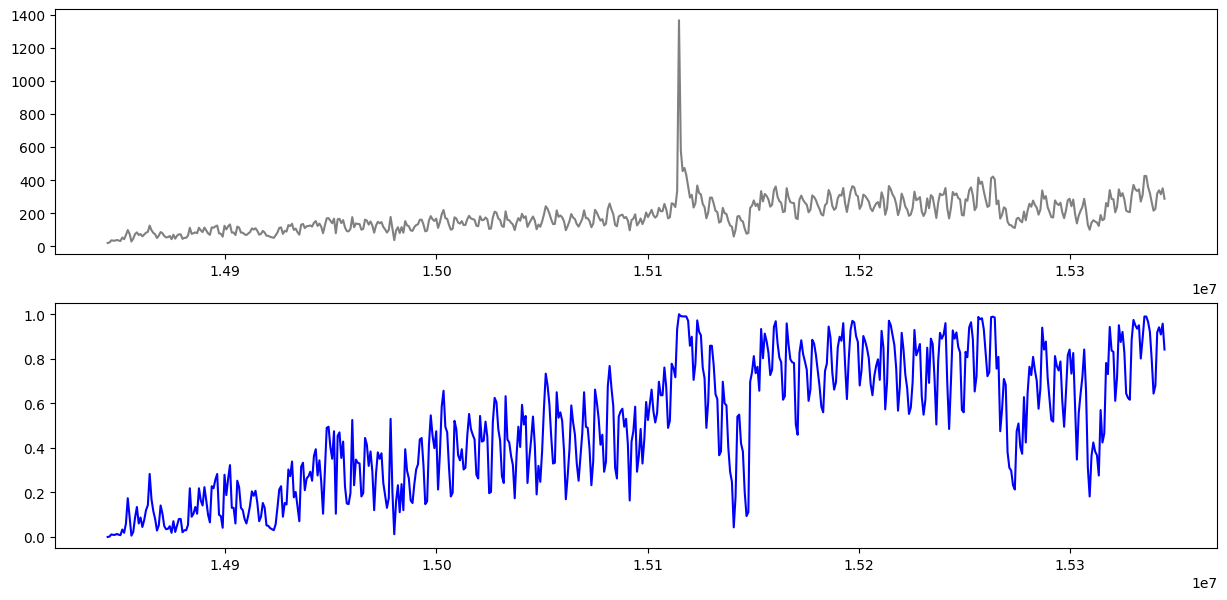

In [39]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(X_train, y_train, "gray")
ax[1].plot(X_train, y_scaled, "blue")

fig.set_figwidth(15)
fig.set_figheight(7)

plt.show()

## Лінійні моделі

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
LR = LinearRegression()

In [42]:
LR.fit(X = X.reshape(-1, 1), y = y)

LinearRegression()

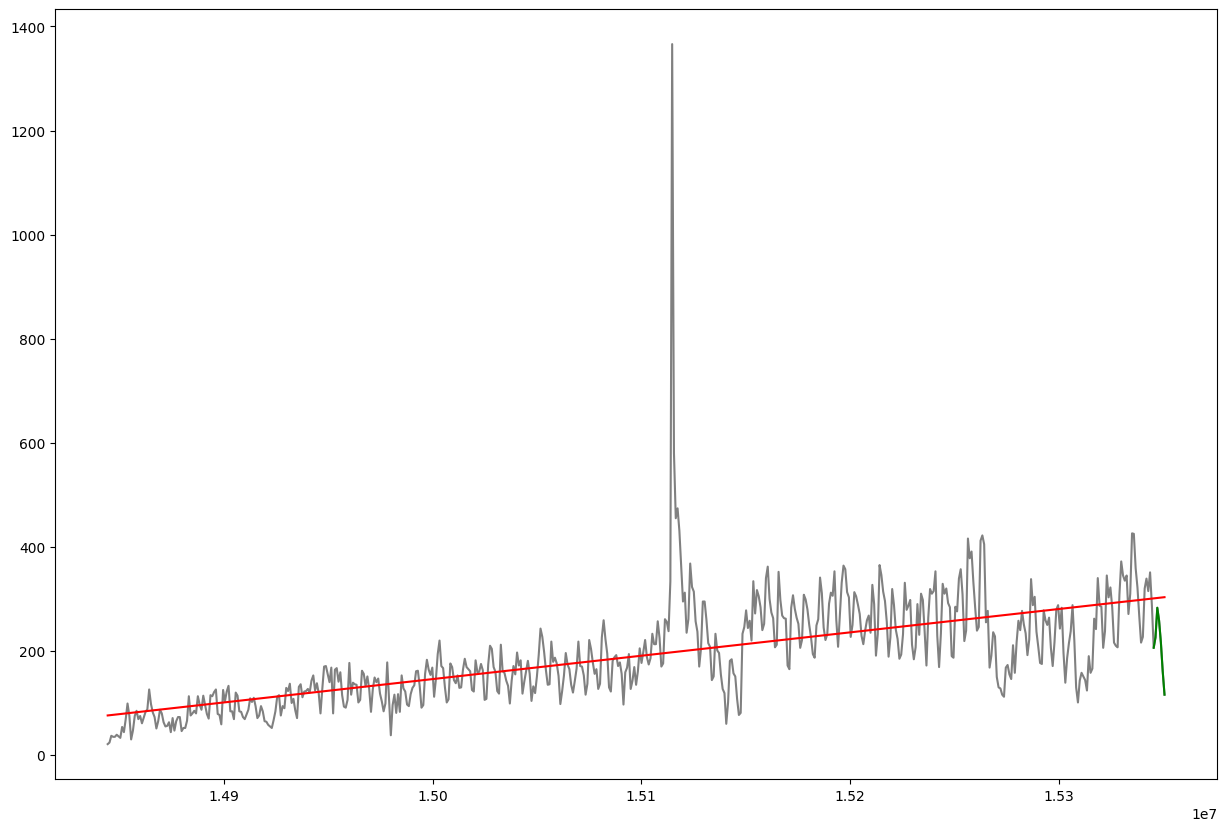

In [43]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")
ax.plot(X, LR.predict(X.reshape(-1, 1)), "red")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

Ця модель показує загальний тренд, але для наших задач не є ідеальною

## Поліноміальні моделі

### Un-Scaled training

In [44]:
poly_degree_range = range(2, 7)

resulting_polies = []

for i in poly_degree_range:
    resulting_polies.append(np.poly1d(np.polyfit(X_train, y_train, i)))

C:\Users\misha\AppData\Local\Temp\ipykernel_16564\2481846824.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies.append(np.poly1d(np.polyfit(X_train, y_train, i)))


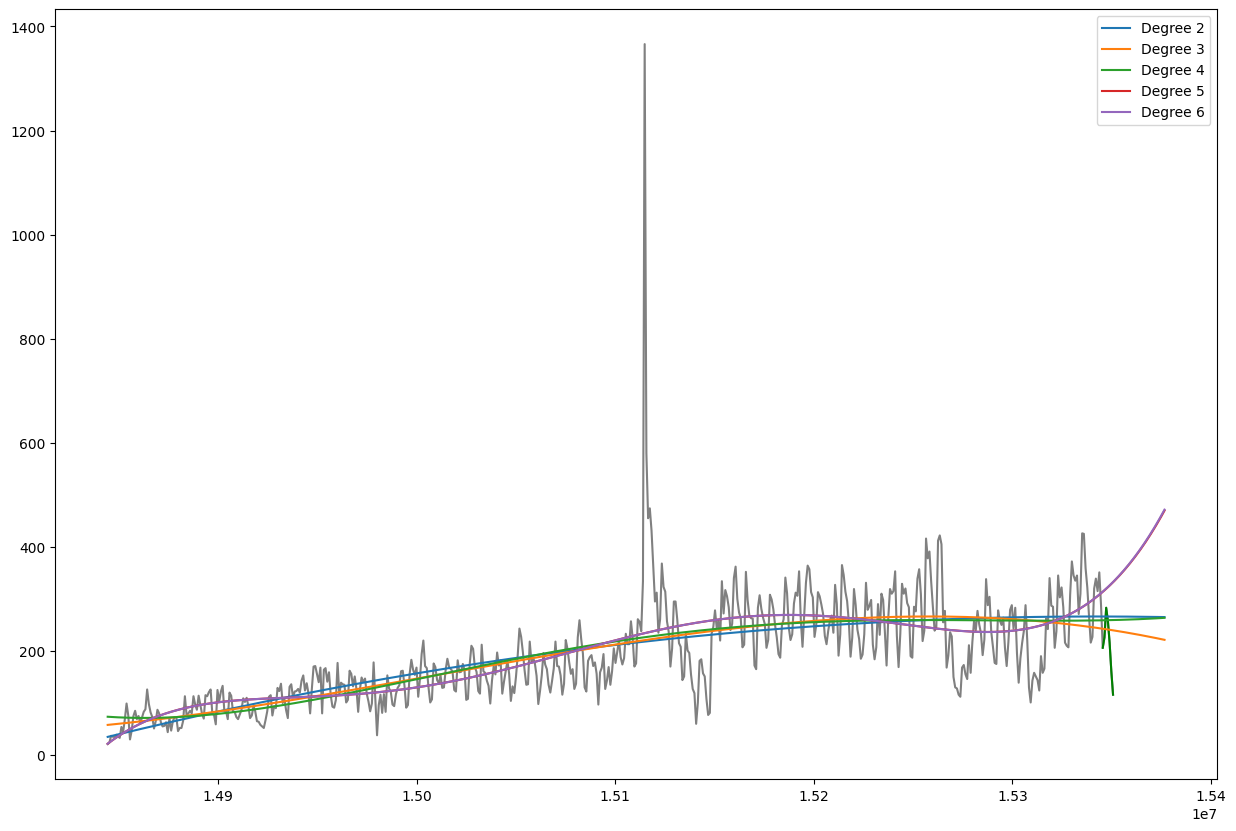

In [45]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")

extra_month = (X + (X.max() -X.min()))[:31]

for i, POLY in enumerate(resulting_polies):
    ax.plot(np.concatenate((X, extra_month)), np.apply_along_axis(POLY, 0, np.concatenate((X, extra_month))), label = f"Degree {i + min(poly_degree_range)}")
    
fig.set_figwidth(15)
fig.set_figheight(10)

ax.legend()

plt.show()

З графіку поліном 4 порядку є найближчим до правди

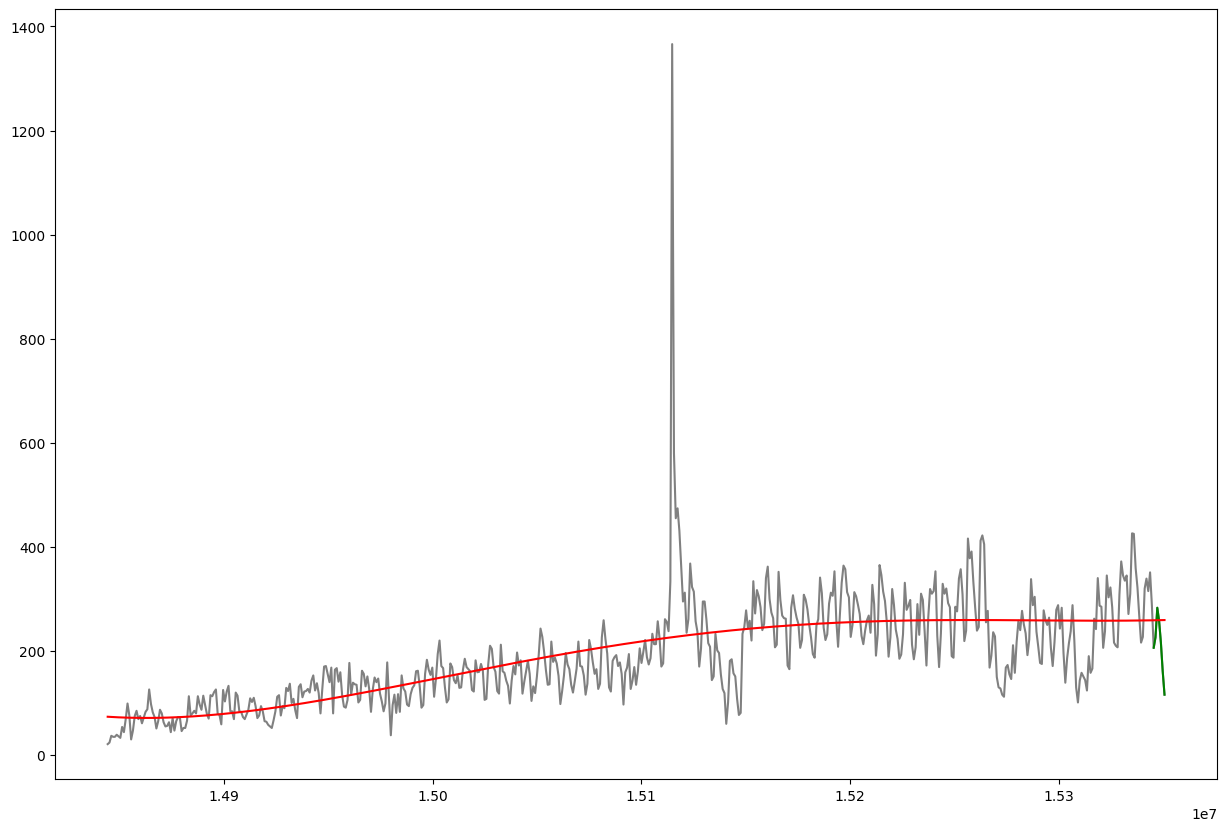

In [46]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")
ax.plot(X, np.apply_along_axis(resulting_polies[2], 0, X), "red")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

This looks to be the best fitting model

In [47]:
POL_4 = resulting_polies[2]

### Scaled training

In [48]:
poly_degree_range = range(2, 10)

resulting_polies_scaled = []

for i in poly_degree_range:
    resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))

C:\Users\misha\AppData\Local\Temp\ipykernel_16564\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))
C:\Users\misha\AppData\Local\Temp\ipykernel_16564\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))
C:\Users\misha\AppData\Local\Temp\ipykernel_16564\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))
C:\Users\misha\AppData\Local\Temp\ipykernel_16564\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))


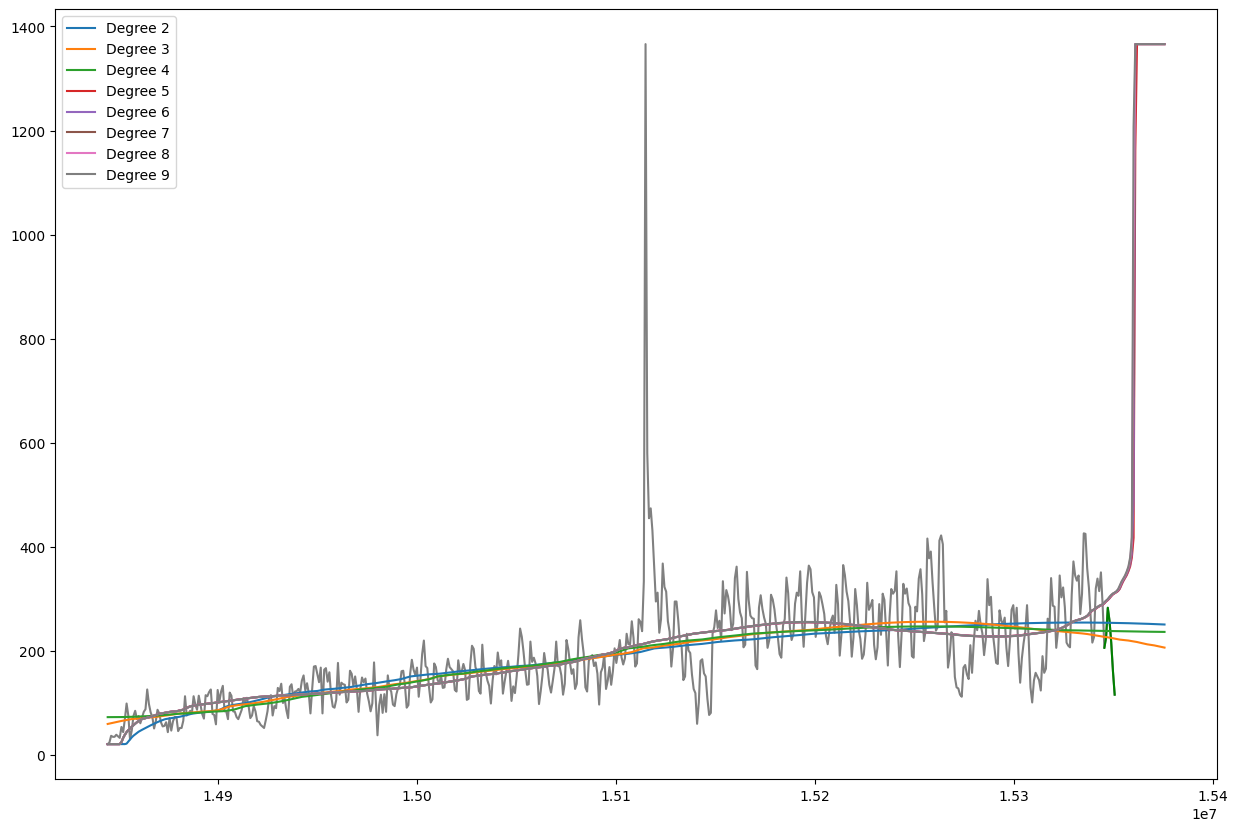

In [49]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")

extra_month = (X + (X.max() -X.min()))[:30]

for i, POLY in enumerate(resulting_polies_scaled):

    y_pred_scaled = np.apply_along_axis(POLY, 0, np.concatenate((X, extra_month)))
    y_pred = scale_transformer.inverse_transform(y_pred_scaled.reshape(-1,1))
    
    ax.plot(
        np.concatenate((
            X, extra_month
        )), 
        y_pred, 
        label = f"Degree {i + min(poly_degree_range)}"
    )
    
fig.set_figwidth(15)
fig.set_figheight(10)

ax.legend()

plt.show()

З графіку поліном 4 порядку є найближчим до правди

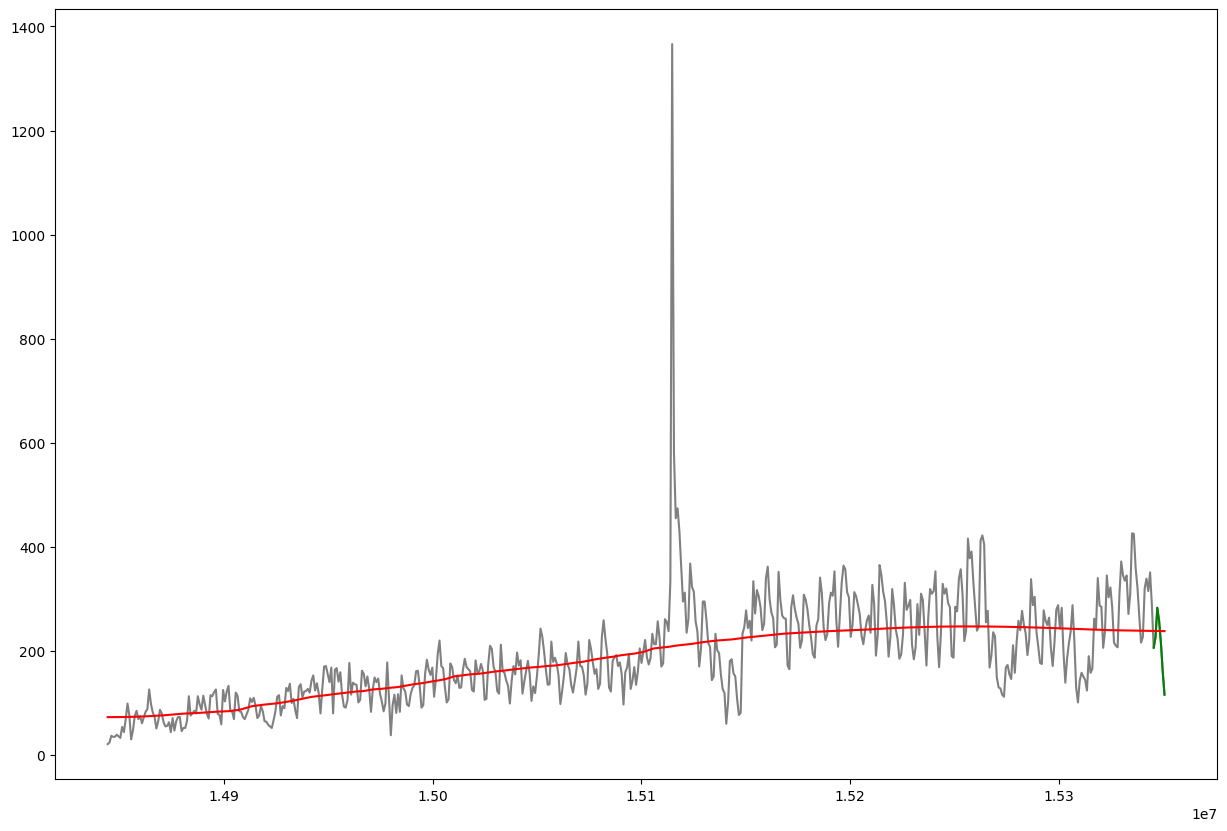

In [50]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")
ax.plot(X, scale_transformer.inverse_transform(np.apply_along_axis(resulting_polies_scaled[2], 0, X).reshape(-1,1)), "red")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

In [51]:
POL_4_SCALED = resulting_polies_scaled[2]

Same deg is best when scaled, lets compare them to each other, and basic linear function

In [52]:
def function_stats(name, pred, actual = y_test):
    print(f"{name}:")
    print(f"Prediction: {pred}")
    print(f"Actual diff: {actual - pred}")
    print(f"MSE: {(actual - pred).mean() ** 2}")

In [53]:
function_stats("Linear function", LR.predict(X_test.reshape(-1, 1)), y[-7:])

Linear function:
Prediction: [300.9873108  301.37510055 301.7628903  302.15068005 302.5384698
 302.92625955 303.3140493 ]
Actual diff: [ -94.9873108   -75.37510055  -18.7628903   -44.15068005  -86.5384698
 -141.92625955 -187.3140493 ]
MSE: 8597.389426950958


In [54]:
function_stats("POL_4 function", 
               np.apply_along_axis(POL_4, 0, X_test),
               y[-7:]
              )

POL_4 function:
Prediction: [258.91317081 258.9793067  259.04850781 259.12082803 259.19632244
 259.27504587 259.35705423]
Actual diff: [ -52.91317081  -32.9793067    23.95149219   -1.12082803  -43.19632244
  -98.27504587 -143.35705423]
MSE: 2469.9513517381465


In [55]:
function_stats("POL_4_SCALED function", 
               scale_transformer.inverse_transform(np.apply_along_axis(POL_4_SCALED, 0, X_test).reshape(-1,1)).reshape(-1),
               y[-7:]
              )

POL_4_SCALED function:
Prediction: [238.42698883 238.36892708 238.31137563 238.25435906 238.19790204
 238.14203003 238.08676731]
Actual diff: [ -32.42698883  -12.36892708   44.68862437   19.74564094  -22.19790204
  -77.14203003 -122.08676731]
MSE: 830.9905753451872


This shows that POL_4_SCALED is the closed to actual next week data 

## Нейронні моделі

Для початку треба перевести дані у векторизований формат

In [56]:
machine_data = pd.DataFrame(index = X_train, data = y_scaled, columns = ["prod_sold"])
machine_data

,prod_sold
14844384,0.000000
14845248,0.002041
14846112,0.011320
14846976,0.009524
14847840,0.009524
...,...
15341184,0.918402
15342048,0.941434
15342912,0.909091
15343776,0.957704


In [57]:
machine_data["timestamp"] = pd.to_datetime(machine_data.index.values * 10 ** 11)
machine_data = machine_data.reset_index()

machine_data["week_day"] = machine_data["timestamp"].dt.weekday
machine_data["month_day"] = machine_data["timestamp"].dt.day
machine_data["month"] = machine_data["timestamp"].dt.month

machine_data

,index,prod_sold,timestamp,week_day,month_day,month
0,14844384,0.000000,2017-01-15,6,15,1
1,14845248,0.002041,2017-01-16,0,16,1
2,14846112,0.011320,2017-01-17,1,17,1
3,14846976,0.009524,2017-01-18,2,18,1
4,14847840,0.009524,2017-01-19,3,19,1
...,...,...,...,...,...,...
575,15341184,0.918402,2018-08-13,0,13,8
576,15342048,0.941434,2018-08-14,1,14,8
577,15342912,0.909091,2018-08-15,2,15,8
578,15343776,0.957704,2018-08-16,3,16,8


In [58]:
machine_data["day_back_1"] = pd.concat([machine_data["prod_sold"][:1], machine_data["prod_sold"][:-1]], ignore_index = True)
machine_data["day_back_2"] = pd.concat([machine_data["prod_sold"][:2], machine_data["prod_sold"][:-2]], ignore_index = True)
machine_data["day_back_3"] = pd.concat([machine_data["prod_sold"][:3], machine_data["prod_sold"][:-3]], ignore_index = True)
machine_data["day_back_4"] = pd.concat([machine_data["prod_sold"][:4], machine_data["prod_sold"][:-4]], ignore_index = True)
machine_data = machine_data[4:]
machine_data

,index,prod_sold,timestamp,week_day,month_day,month,day_back_1,day_back_2,day_back_3,day_back_4
4,14847840,0.009524,2017-01-19,3,19,1,0.009524,0.011320,0.002041,0.000000
5,14848704,0.013436,2017-01-20,4,20,1,0.009524,0.009524,0.011320,0.002041
6,14849568,0.010261,2017-01-21,5,21,1,0.013436,0.009524,0.009524,0.011320
7,14850432,0.008163,2017-01-22,6,22,1,0.010261,0.013436,0.009524,0.009524
8,14851296,0.033463,2017-01-23,0,23,1,0.008163,0.010261,0.013436,0.009524
...,...,...,...,...,...,...,...,...,...,...
575,15341184,0.918402,2018-08-13,0,13,8,0.680135,0.643939,0.795286,0.920697
576,15342048,0.941434,2018-08-14,1,14,8,0.918402,0.680135,0.643939,0.795286
577,15342912,0.909091,2018-08-15,2,15,8,0.941434,0.918402,0.680135,0.643939
578,15343776,0.957704,2018-08-16,3,16,8,0.909091,0.941434,0.918402,0.680135


In [59]:
machine_data.corr()["prod_sold"].abs().sort_values().apply(lambda b:f"{b :.6f}")

month_day     0.079625
month         0.102397
week_day      0.275275
day_back_4    0.733555
day_back_3    0.746280
index         0.780410
timestamp     0.780410
day_back_2    0.791172
day_back_1    0.889943
prod_sold     1.000000
Name: prod_sold, dtype: object

This shows very bad correlation of separate time elements to train the model, but using timestamps whole is difficult for the model, thus requring testing of this training. Bacause weekday provides most correlation it will be vectorised, other numerical values will be scaled

In [60]:
# Normalizing the data

day_dummies = pd.get_dummies(machine_data["week_day"], prefix="IsDay")  # week day has the most corr, so I set it as vector

machine_data = pd.concat([machine_data, day_dummies], axis=1)


machine_data["month_day_norm"] = (machine_data["month_day"]-machine_data["month_day"].min())/(machine_data["month_day"].max()-machine_data["month_day"].min())


machine_data["month_norm"] = (machine_data["month"]-machine_data["month"].min())/(machine_data["month"].max()-machine_data["month"].min())


machine_data

,index,prod_sold,timestamp,week_day,month_day,month,day_back_1,day_back_2,day_back_3,day_back_4,IsDay_0,IsDay_1,IsDay_2,IsDay_3,IsDay_4,IsDay_5,IsDay_6,month_day_norm,month_norm
4,14847840,0.009524,2017-01-19,3,19,1,0.009524,0.011320,0.002041,0.000000,False,False,False,True,False,False,False,0.600000,0.000000
5,14848704,0.013436,2017-01-20,4,20,1,0.009524,0.009524,0.011320,0.002041,False,False,False,False,True,False,False,0.633333,0.000000
6,14849568,0.010261,2017-01-21,5,21,1,0.013436,0.009524,0.009524,0.011320,False,False,False,False,False,True,False,0.666667,0.000000
7,14850432,0.008163,2017-01-22,6,22,1,0.010261,0.013436,0.009524,0.009524,False,False,False,False,False,False,True,0.700000,0.000000
8,14851296,0.033463,2017-01-23,0,23,1,0.008163,0.010261,0.013436,0.009524,True,False,False,False,False,False,False,0.733333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,15341184,0.918402,2018-08-13,0,13,8,0.680135,0.643939,0.795286,0.920697,True,False,False,False,False,False,False,0.400000,0.636364
576,15342048,0.941434,2018-08-14,1,14,8,0.918402,0.680135,0.643939,0.795286,False,True,False,False,False,False,False,0.433333,0.636364
577,15342912,0.909091,2018-08-15,2,15,8,0.941434,0.918402,0.680135,0.643939,False,False,True,False,False,False,False,0.466667,0.636364
578,15343776,0.957704,2018-08-16,3,16,8,0.909091,0.941434,0.918402,0.680135,False,False,False,True,False,False,False,0.500000,0.636364


In [61]:
machine_data_train = machine_data.sample(frac=0.9,random_state=200)
machine_data_test = machine_data.drop(machine_data_train.index)

m_x_train = machine_data_train[["day_back_1", "day_back_2", "day_back_3", "day_back_4", "month_day_norm", "month_norm", "IsDay_0", "IsDay_1", "IsDay_2", "IsDay_3", "IsDay_4", "IsDay_5", "IsDay_6"]]
m_x_test = machine_data_test[["day_back_1", "day_back_2", "day_back_3", "day_back_4", "month_day_norm", "month_norm", "IsDay_0", "IsDay_1", "IsDay_2", "IsDay_3", "IsDay_4", "IsDay_5", "IsDay_6"]]

m_y_train = machine_data_train[["prod_sold"]]
m_y_test = machine_data_test[["prod_sold"]]

print(m_x_train.shape, m_y_train.shape, m_x_test.shape, m_y_test.shape, sep = "\n")

(518, 13)
(518, 1)
(58, 13)
(58, 1)


In [62]:
import keras

sales_model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(m_x_train.shape[1],)),
    keras.layers.Flatten(),
    keras.layers.Dense(m_x_train.shape[1], activation='relu'),
    keras.layers.Dense(m_x_train.shape[1], activation='relu'),
    keras.layers.Dense(m_x_train.shape[1], activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

In [63]:
sales_model.compile(
    optimizer = "rmsprop", 
    loss = "mean_squared_error",
)

In [64]:
callbacks = [keras.callbacks.ModelCheckpoint("models/best_model.keras", save_best_only=True)]

In [65]:
sales_model.fit(
    m_x_train.astype(float).to_numpy(copy=False), 
    m_y_train.astype(float).to_numpy(copy=False),
    epochs=100, 
    batch_size=16, 
    validation_data=(
        m_x_test.astype(float).to_numpy(copy=False), 
        m_y_test.astype(float).to_numpy(copy=False)
    ),
    callbacks = callbacks
)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0721 - val_loss: 0.0693
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0641 - val_loss: 0.0570
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0549 - val_loss: 0.0438
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0434 - val_loss: 0.0291
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - val_loss: 0.0206
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - val_loss: 0.0144
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 - val_loss: 0.0112
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - val_loss: 0.0091
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - val_loss: 0.0090
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0083
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0075
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [66]:
sales_model.save("models/sales_model_checkpoint1.keras")

In [67]:
best_sales_model = keras.saving.load_model("models/best_model.keras")

In [68]:
model_prediction = best_sales_model.predict(m_x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [69]:
function_stats("Neural", model_prediction.reshape(-1), m_y_test["prod_sold"].values)

Neural:
Prediction: [0.0687246  0.0889497  0.17246526 0.13673665 0.12651946 0.18138483
 0.1340808  0.10108162 0.25884846 0.11932738 0.38931206 0.189395
 0.37140036 0.2387028  0.25712943 0.32652712 0.21436836 0.28545368
 0.5128702  0.32177618 0.28742355 0.30957526 0.5824313  0.47784498
 0.18889228 0.620597   0.6164615  0.5732821  0.37622643 0.5497102
 0.57341146 0.9701039  0.70832074 0.79888904 0.24834251 0.67261183
 0.9005579  0.6167079  0.71149355 0.90680695 0.73979616 0.8728232
 0.7139814  0.91104966 0.5943943  0.91833806 0.8901305  0.8963642
 0.92704374 0.34946847 0.8018527  0.5165495  0.8251679  0.70262456
 0.759118   0.8932027  0.8912263  0.86634165]
Actual diff: [-0.00811853  0.08502534 -0.08155617 -0.0371319  -0.06086289  0.00354861
 -0.06337373 -0.06129991  0.07994936  0.02809277 -0.15698883 -0.00757681
 -0.05225142  0.04412548  0.13680996  0.04721026 -0.03255018 -0.08606138
 -0.02802171  0.02219545  0.10651584  0.00120698 -0.15412385 -0.05360256
 -0.01491723 -0.02463741  0.033

In [70]:
def chain_predict_model(date_start, date_end, prev_sells = None, predict_model = sales_model):

    if prev_sells is None:
        prev_sells = np.zeros(4)

    prev_sells = scale_transformer.transform(prev_sells.reshape(-1, 1)).reshape(-1)

    today = date_start
    today_timestamp = pd.to_datetime(today)

    end_timestamp = pd.to_datetime(date_end)

    while today_timestamp <= end_timestamp:
        
        today_sales = predict_model.predict(np.array([[
            prev_sells[0],
            prev_sells[1],
            prev_sells[2],
            prev_sells[3],
            (today_timestamp.day - 1) / 30,
            (today_timestamp.month - 1) / 11,
            int(today_timestamp.dayofweek == 0),
            int(today_timestamp.dayofweek == 1),
            int(today_timestamp.dayofweek == 2),
            int(today_timestamp.dayofweek == 3),
            int(today_timestamp.dayofweek == 4),
            int(today_timestamp.dayofweek == 5),
            int(today_timestamp.dayofweek == 6),
        ]]), verbose=0)
        
        yield scale_transformer.inverse_transform(today_sales).reshape(-1)

        prev_sells[:-1] = prev_sells[1:]
        prev_sells[-1] = today_sales[0][0]

        today_timestamp += pd.DateOffset(1)
    

In [71]:
two_year_prediction = np.array(
    list(chain_predict_model(X[4] * 10 ** 11, X[-1] * 10 ** 11, y[:4], predict_model = best_sales_model))
)

In [72]:
week_prediction = np.array(
    list(chain_predict_model(X[-7] * 10 ** 11, X[-1] * 10 ** 11, y[-12:-8], predict_model = best_sales_model))
)

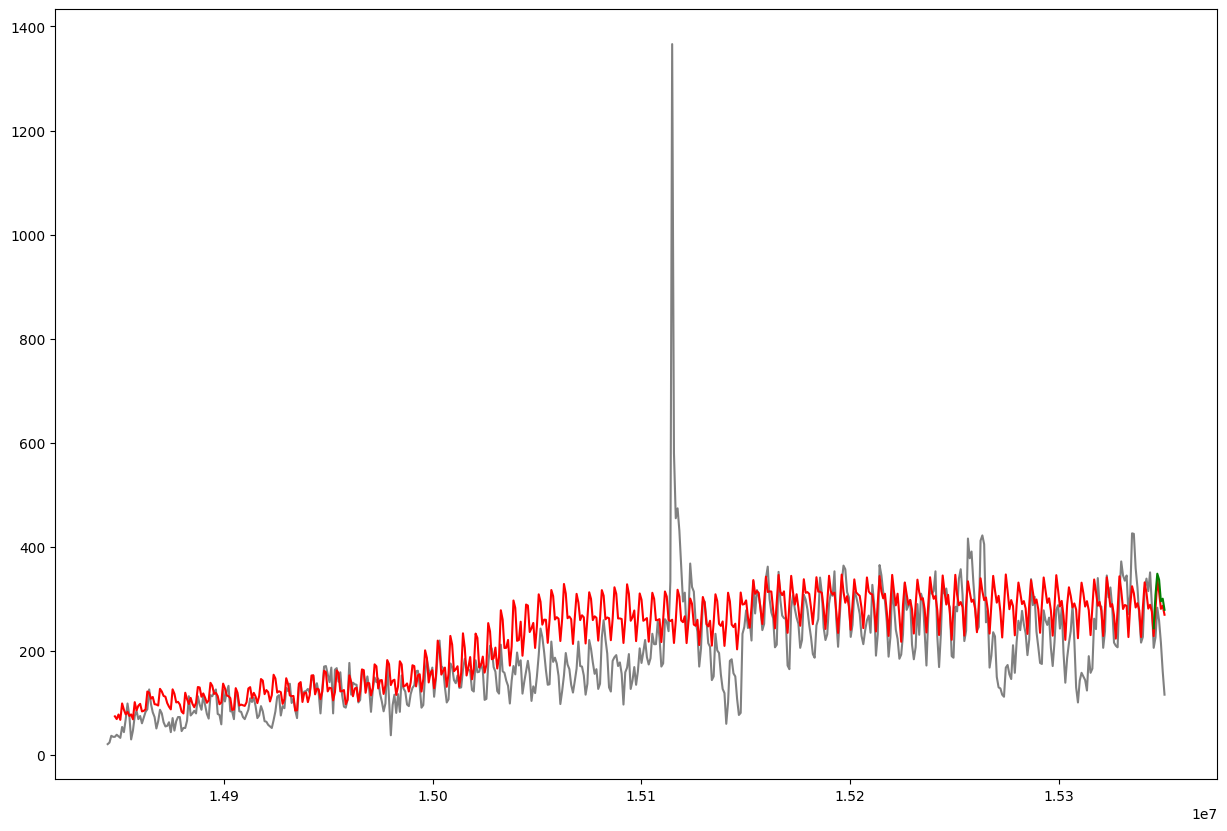

In [73]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X[4:], two_year_prediction.reshape(-1), "red")
ax.plot(X[-7:], week_prediction.reshape(-1), "green")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

In [74]:
function_stats("Machine model", week_prediction.reshape(-1), y[-7:])

Machine model:
Prediction: [243.52066 307.24112 348.44498 336.96576 295.4     300.43863 279.02145]
Actual diff: [ -37.5206604   -81.24111938  -65.44497681  -78.96575928  -79.3999939
 -139.43862915 -163.02145386]
MSE: 8491.164198775983


Незважаючи що модель машинного навчання показує краші результати зі знаходження циклічності, вона не надає правильних значень, тому її застовування може бути не точним, але всеодно корисним для побудови моделі продаж

## Відображення всіх моделей разом

In [75]:
function_stats("Machine model", week_prediction.reshape(-1), y[-7:])

Machine model:
Prediction: [243.52066 307.24112 348.44498 336.96576 295.4     300.43863 279.02145]
Actual diff: [ -37.5206604   -81.24111938  -65.44497681  -78.96575928  -79.3999939
 -139.43862915 -163.02145386]
MSE: 8491.164198775983


In [76]:
function_stats("POL_4 function", 
               np.apply_along_axis(POL_4, 0, X_test),
               y[-7:]
              )

POL_4 function:
Prediction: [258.91317081 258.9793067  259.04850781 259.12082803 259.19632244
 259.27504587 259.35705423]
Actual diff: [ -52.91317081  -32.9793067    23.95149219   -1.12082803  -43.19632244
  -98.27504587 -143.35705423]
MSE: 2469.9513517381465


In [77]:
function_stats("POL_4_SCALED function", 
               scale_transformer.inverse_transform(np.apply_along_axis(POL_4_SCALED, 0, X_test).reshape(-1,1)).reshape(-1),
               y[-7:]
              )

POL_4_SCALED function:
Prediction: [238.42698883 238.36892708 238.31137563 238.25435906 238.19790204
 238.14203003 238.08676731]
Actual diff: [ -32.42698883  -12.36892708   44.68862437   19.74564094  -22.19790204
  -77.14203003 -122.08676731]
MSE: 830.9905753451872


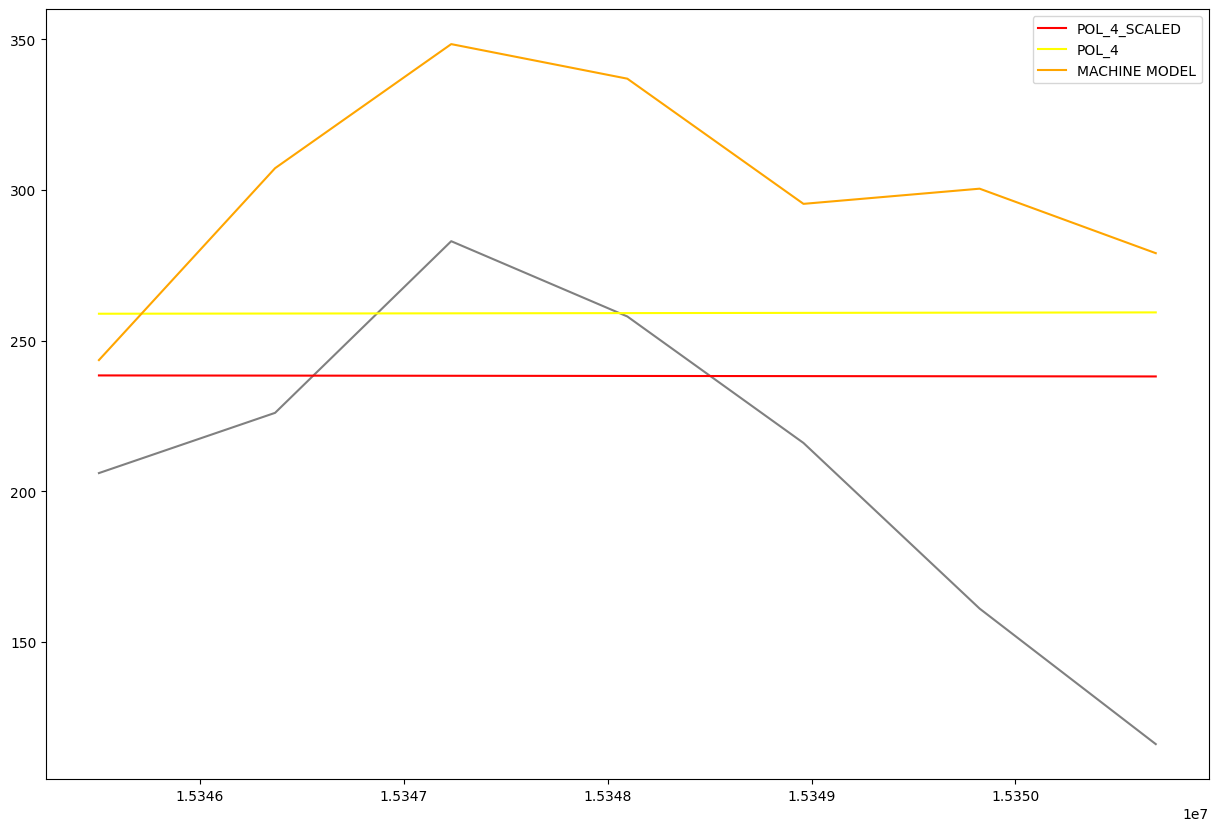

In [78]:
fig, ax = plt.subplots()

ax.plot(X_test, y_test, "gray")

ax.plot(X_test, scale_transformer.inverse_transform(np.apply_along_axis(POL_4_SCALED, 0, X_test).reshape(-1,1)), "red", label = "POL_4_SCALED")
ax.plot(X_test, np.apply_along_axis(POL_4, 0, X_test), "yellow", label = "POL_4")
ax.plot(X_test, week_prediction.reshape(-1), "orange", label = "MACHINE MODEL")
    
fig.set_figwidth(15)
fig.set_figheight(10)

ax.legend()

plt.show()